In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# import 2024 pro tour stats
Stats = pd.read_csv('dgpt_2024_stats_onescore_copy.csv')
## See DGData.py for import and cleaning history of this file

Stats[:3]

,Name,Scores,Fairway Hits %,ked %,Circle 1 in Reg %,Circle 2 in Reg %,Scramble %,Circle 1x Putting %,Circle 2 Putting %,OB
0,Gannon Buhr,-0.4114,78.72,11.05,48.11,70.35,60.22,90.85,35.18,0.084
1,Richard Wysocki,-0.3882,77.72,11.19,45.72,67.42,63.12,89.86,37.95,0.083
2,Niklas Anttila,-0.2983,78.28,10.67,42.47,65.63,41.77,87.07,30.37,0.093


In [19]:
# Create pearson correlation matrix to find which categories drive scoring
stats_columns = ['Scores', 'Fairway Hits %', 'ked %', 'Circle 1 in Reg %', 'Circle 2 in Reg %', 
                 'Scramble %', 'Circle 1 in Reg %', 'Circle 2 Putting %', 'OB']

# Calculate the Pearson correlation matrix
correlation_matrix = Stats[stats_columns].corrwith(Stats['Scores'], method='pearson')
#correlation_matrix.head(10)
scoring = pd.DataFrame([correlation_matrix])
scoring.head()

,Scores,Fairway Hits %,ked %,Circle 1 in Reg %,Circle 2 in Reg %,Scramble %,Circle 1x Putting %,Circle 2 Putting %,OB
0,1.0,-0.718558,-0.692418,-0.819011,-0.812216,-0.774551,-0.434238,-0.419015,0.766885


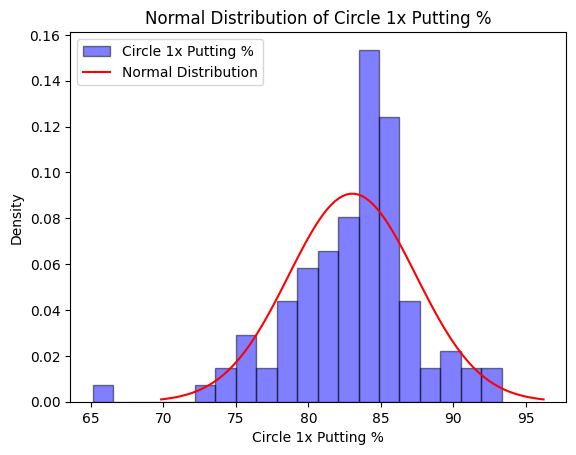

Mean Circle 1x Putting %: 83.03
Standard Deviation of Circle 1x Putting %: 4.40


In [ ]:
# Create normal distribution of C1 putting 

Stats.plot.histogram = Stats['Circle 1x Putting %'].plot.hist(bins=20, density=True, alpha=0.5, color='blue', edgecolor='black')
# Create a normal distribution based on the mean and standard deviation of C1 putting
mean_c1 = Stats['Circle 1x Putting %'].mean()
std_c1 = Stats['Circle 1x Putting %'].std()
x = np.linspace(mean_c1 - 3*std_c1, mean_c1 + 3*std_c1, 100)

# Calculate the normal distribution
y = norm.pdf(x, mean_c1, std_c1)


# Plot the normal distribution
plt.plot(x, y, color='red', label='Normal Distribution')
plt.xlabel('Circle 1x Putting %')
plt.ylabel('Density')
plt.title('Normal Distribution of Circle 1x Putting %')
plt.legend()
plt.show()

print(f"Mean Circle 1x Putting %: {mean_c1:.2f}")
print(f"Standard Deviation of Circle 1x Putting %: {std_c1:.2f}")

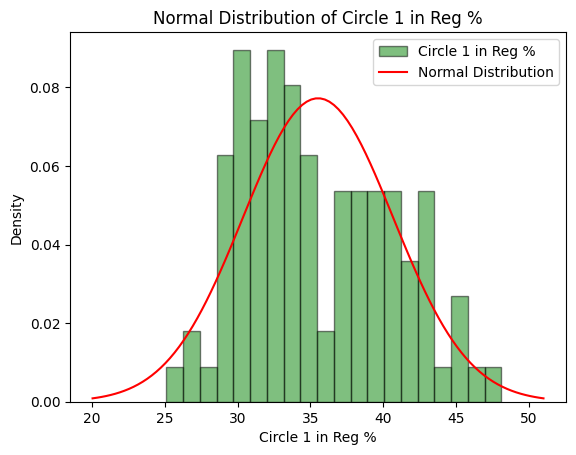

Mean Circle 1 in Reg %: 35.52
Standard Deviation of Circle 1 in Reg %: 5.16


In [27]:
# Create normal distribution of C1 in Regulation 

Stats.plot.histogram = Stats['Circle 1 in Reg %'].plot.hist(bins=20, density=True, alpha=0.5, color='green', edgecolor='black')
# Create a normal distribution based on the mean and standard deviation of C1 in Regulation
mean_c1 = Stats['Circle 1 in Reg %'].mean()
std_c1 = Stats['Circle 1 in Reg %'].std()
x = np.linspace(mean_c1 - 3*std_c1, mean_c1 + 3*std_c1, 100)

# Calculate the normal distribution
y = norm.pdf(x, mean_c1, std_c1)


# Plot the normal distribution
plt.plot(x, y, color='red', label='Normal Distribution')
plt.xlabel('Circle 1 in Reg %')
plt.ylabel('Density')
plt.title('Normal Distribution of Circle 1 in Reg %')
plt.legend()
plt.show()

print(f"Mean Circle 1 in Reg %: {mean_c1:.2f}")
print(f"Standard Deviation of Circle 1 in Reg %: {std_c1:.2f}")

Mean Scores: -0.14
Standard Deviation of Scores: 0.09


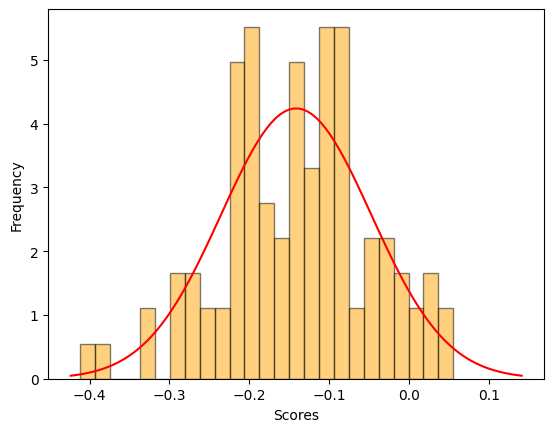

In [29]:
# Should probably plot scores, huh...

Stats.plot.histogram = Stats['Scores'].plot.hist(bins=25, density=True, alpha=0.5, color='orange', edgecolor='black')
# Create a normal distribution based on the mean and standard deviation of scores
mean_scores = Stats['Scores'].mean()
std_scores = Stats['Scores'].std()
x = np.linspace(mean_scores - 3*std_scores, mean_scores + 3*std_scores, 100)
# Calculate the normal distribution
y = norm.pdf(x, mean_scores, std_scores)
# Plot the normal distribution
plt.plot(x, y, color='red', label='Normal Distribution')
plt.xlabel('Scores')    

print(f"Mean Scores: {mean_scores:.2f}")
print(f"Standard Deviation of Scores: {std_scores:.2f}")